# Histogram Equalization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

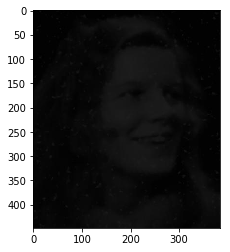

In [2]:
img = cv2.imread('datasets/hw3.jpg')
plt.imshow(img)
plt.show()

In [3]:
print(img.shape)

(448, 384, 3)


### Transform image from 3 dimension to 1 dimension

In [4]:
# img.ravel()
hist_list = list()
for i in img:
    for j in i:
        for k in j:
            hist_list.append(k)
# print(hist_list)

### Draw Histogram 

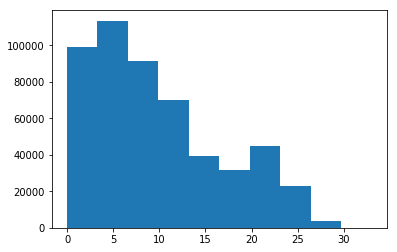

In [5]:
plt.hist(hist_list)
plt.show()

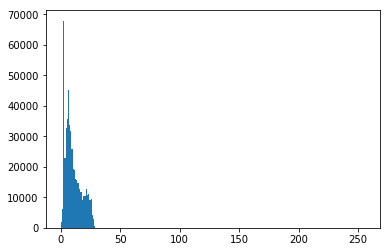

In [6]:
plt.hist(hist_list, 256, [0, 256])
plt.show()

### Cumulative Sum

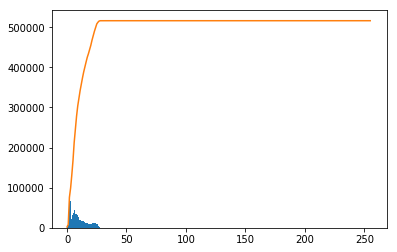

In [7]:
hist_256_list = [0 * i for i in range(256)]
cdf_256_list = [0 * i for i in range(256)]
for i in hist_list:
    hist_256_list[i] += 1
# print(hist_256_list)
for i, j in enumerate(hist_256_list):
    if i == 0:
        cdf_256_list[i] = hist_256_list[i]
    else:
        cdf_256_list[i] = cdf_256_list[i - 1] + hist_256_list[i]
# print(cdf_256_list)
plt.hist(hist_list, 256, [0, 256])
plt.plot(cdf_256_list)
plt.show()

### Normalization

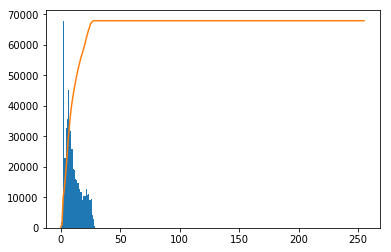

In [8]:
cdf_nor_list = [0 * i for i in range(256)]
hist_max = max(hist_256_list)
cdf_max = max(cdf_256_list)
for i, j in enumerate(cdf_256_list):
    cdf_nor_list[i] = j * hist_max / cdf_max
# print(cdf_nor_list)
plt.hist(hist_list, 256, [0, 256])
plt.plot(cdf_nor_list)
plt.show()

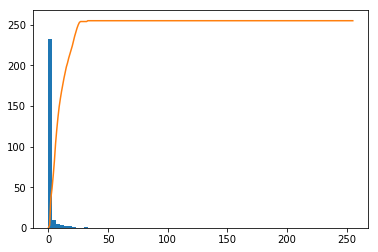

In [9]:
cdf_mask_list = [0 * i for i in range(256)]
hist_mask_list = [0 * i for i in range(256)]
cdf_min = min(cdf_256_list) # be sure to exclude 0
for i, j in enumerate(cdf_256_list):
    cdf_mask_list[i] = (j - cdf_min) * 255 / (cdf_max - cdf_min)
# print(cdf_mask_list)
import math
for i, j in enumerate(cdf_mask_list):
    cdf_mask_list[i] = math.floor(j)
# print(cdf_mask_list)
for i, j in enumerate(cdf_mask_list):
    if i == 0:
        hist_mask_list[i] = cdf_mask_list[i]
    else:
        hist_mask_list[i] = cdf_mask_list[i] - cdf_mask_list[i - 1]
# print(hist_mask_list)
plt.hist(hist_mask_list)
plt.plot(cdf_mask_list)
plt.show()

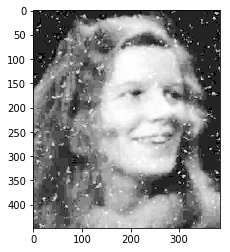

In [10]:
cdf_array = np.array(cdf_mask_list)
output = cdf_array[img]
plt.imshow(output)
plt.show()